# Building A Handwritten Digits Classifier

In this Guided Project:

* the limitations of traditional machine learning models for image classification will be observed 
* a few different deep neural networks for image classification will be trained, tested, and improved

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import dataset with handwritten digits
from sklearn.datasets import load_digits

In [3]:
# read data
data = load_digits()
df = pd.DataFrame(data.data)
target = pd.Series(data.target)

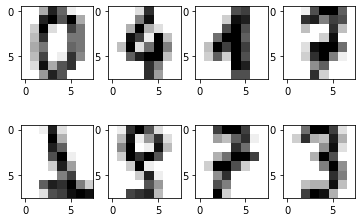

In [4]:
# illustrate examples
fig = plt.figure()
rows = [0,100,200,300,1000,1100,1200,1300]
axes = ['ax{}'.format(x) for x in range(1,9)]
for i in range(0,8):
    axes[i] = fig.add_subplot(2,4,i+1)
    np_image = df.iloc[rows[i]].values.reshape(8,8) 
    axes[i].imshow(np_image, cmap='gray_r')

### K-Nearest Neighbors Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier 

In [6]:
# spliting data train and test
n_frac = 0.5
train_X = df.sample(frac = n_frac)
train_y = target[train_X.index]
test_X = df.loc[~df.index.isin(train_X.index)]
test_y = target[~target.index.isin(train_X.index)]

In [7]:
# function for experiments
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# function to train model
def train(k, X, y):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X,y)
    return knc

# function to test model
def test(model, X_ts, y_ts):
    pr = model.predict(X_ts)
    accuracy = accuracy_score(y_ts,pr)
    return accuracy

# fnction to run model with cross-validation
def cross_validate(df, k):
    kf = KFold(4, shuffle = True, random_state = 5)
    accuracies = []
    for train_i, test_i in kf.split(df):
        X = df.iloc[train_i]
        y = target.iloc[train_i]
        X_ts = df.iloc[test_i]
        y_ts = target.iloc[test_i]
        model = train(k, X, y)
        accuracies.append(test(model, X_ts, y_ts))
    return np.mean(accuracies)
    

Accuracy with 1 neighbors:  0.9855295718881465
Accuracy with 2 neighbors:  0.9816332590942836
Accuracy with 3 neighbors:  0.9827456075228903
Accuracy with 4 neighbors:  0.9805209106656768
Accuracy with 5 neighbors:  0.9827493194753774
Accuracy with 6 neighbors:  0.9810789408562237
Accuracy with 7 neighbors:  0.9821925266023261
Accuracy with 8 neighbors:  0.9805221479831725
Accuracy with 9 neighbors:  0.9816357337292749
Accuracy with 10 neighbors:  0.9766258351893096
Accuracy with 11 neighbors:  0.9782974511259589
Accuracy with 12 neighbors:  0.9777406582529077
Accuracy with 13 neighbors:  0.9744023756495918
Accuracy with 14 neighbors:  0.9738455827765405


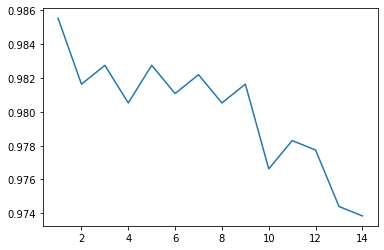

In [8]:
#plot dependence 
accuracy = []
for i in range(1,15):
    accuracy.append(cross_validate(df, i))
    print('Accuracy with', i, 'neighbors: ', cross_validate(df, i))
plt.plot([x for x in range(1,15)],accuracy)

The accuracy value is extremely high, tends to fall with number of neighbors in the model

There are a few downsides to using k-nearest neighbors:

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

### Neural Network With One Hidden Layer

In [11]:
# function for experiments for nn
from sklearn.neural_network import MLPClassifier

# function to train model nn
def train_mpl(k, X, y):
    mlp = MLPClassifier(hidden_layer_sizes = (k,), max_iter = 1000)
    mlp.fit(X,y)
    return mlp

# function to test model nn
def test_mpl(model, X_ts, y_ts):
    pr = model.predict(X_ts)
    accuracy = accuracy_score(y_ts,pr)
    return accuracy

# fnction to run model with cross-validation nn
def cross_validate_mpl(df, k):
    kf = KFold(4, shuffle = True, random_state = 5)
    accuracies_X = []
    accuracies_y = []
    for train_i, test_i in kf.split(df):
        X = df.iloc[train_i]
        y = target.iloc[train_i]
        X_ts = df.iloc[test_i]
        y_ts = target.iloc[test_i]
        
        model = train_mpl(k, X, y)
        
        accuracies_X.append(test_mpl(model, X_ts, y_ts))
        accuracies_y.append(test_mpl(model, X, y))
        
    return np.mean(accuracies_X), np.mean(accuracies_y)

8 neurons: accuracy_X 0.9326565206632023, accuracy_y 0.9996290801186943
16 neurons: accuracy_X 0.9560368720613709, accuracy_y 0.9998145400593472
32 neurons: accuracy_X 0.9682838406335066, accuracy_y 1.0
64 neurons: accuracy_X 0.9654912150457806, accuracy_y 1.0
128 neurons: accuracy_X 0.9755134867607028, accuracy_y 1.0
256 neurons: accuracy_X 0.9755134867607028, accuracy_y 1.0


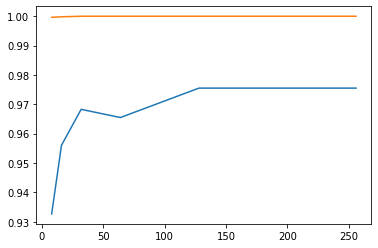

In [12]:
#plot dependence 
accuracy = []
for i in [8,16,32,64,128,256]:
    a = cross_validate_mpl(df, i)
    a0 = a[0]
    a1 = a[1]
    accuracy.append(a)
    print('{} neurons: accuracy_X {}, accuracy_y {}'.format(i, a[0], a[1]))
plt.plot([8,16,32,64,128,256],accuracy)

The accuracy is high, but lower than in KNeighborClassifier
NN model perfectly predicts thain value
accuracy raises with number of neurons

### Neural Network With Two Hidden Layers

In [13]:
# function for experiments for nn
from sklearn.neural_network import MLPClassifier

# function to train model nn
def train_mpl(k, X, y):
    mlp = MLPClassifier(hidden_layer_sizes = (k,k), max_iter = 1000)
    mlp.fit(X,y)
    return mlp

# function to test model nn
def test_mpl(model, X_ts, y_ts):
    pr = model.predict(X_ts)
    accuracy = accuracy_score(y_ts,pr)
    return accuracy

# fnction to run model with cross-validation nn
def cross_validate_mpl(df, k):
    kf = KFold(4, shuffle = True, random_state = 5)
    accuracies_X = []
    accuracies_y = []
    for train_i, test_i in kf.split(df):
        X = df.iloc[train_i]
        y = target.iloc[train_i]
        X_ts = df.iloc[test_i]
        y_ts = target.iloc[test_i]
        
        model = train_mpl(k, X, y)
        
        accuracies_X.append(test_mpl(model, X_ts, y_ts))
        accuracies_y.append(test_mpl(model, X, y))
        
    return np.mean(accuracies_X), np.mean(accuracies_y)

In [15]:
a = cross_validate_mpl(df, 64)
a0 = a[0]
a1 = a[1]
print('{} neurons: accuracy_X {}, accuracy_y {}'.format(64,a[0], a[1]))

64 neurons: accuracy_X 0.9716196486018313, accuracy_y 1.0


Accuracy with 2 hidden layers og 64 neurons predicts better than model with 1 layer with 64 neurons

### Neural Network With Three Hidden Layers

In [17]:
# function for experiments for nn
from sklearn.neural_network import MLPClassifier

# function to train model nn
def train_mpl(k, X, y):
    mlp = MLPClassifier(hidden_layer_sizes = (k,k,k), max_iter = 1000)
    mlp.fit(X,y)
    return mlp

# function to test model nn
def test_mpl(model, X_ts, y_ts):
    pr = model.predict(X_ts)
    accuracy = accuracy_score(y_ts,pr)
    return accuracy

# fnction to run model with cross-validation nn
def cross_validate_mpl(df, k):
    kf = KFold(6, shuffle = True, random_state = 5)
    accuracies_X = []
    accuracies_y = []
    for train_i, test_i in kf.split(df):
        X = df.iloc[train_i]
        y = target.iloc[train_i]
        X_ts = df.iloc[test_i]
        y_ts = target.iloc[test_i]
        
        model = train_mpl(k, X, y)
        
        accuracies_X.append(test_mpl(model, X_ts, y_ts))
        accuracies_y.append(test_mpl(model, X, y))
        
    return np.mean(accuracies_X), np.mean(accuracies_y)

10 neurons: accuracy_X 0.9426681531029358, accuracy_y 0.9998886662213314
64 neurons: accuracy_X 0.9749479747305833, accuracy_y 1.0
128 neurons: accuracy_X 0.9755146785581568, accuracy_y 1.0


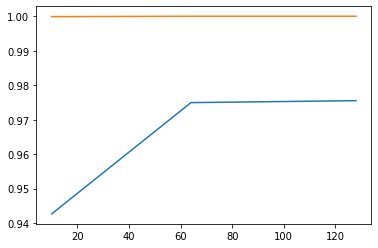

In [18]:
#plot dependence 
accuracy = []
for i in [10,64,128]:
    a = cross_validate_mpl(df, i)
    a0 = a[0]
    a1 = a[1]
    accuracy.append(a)
    print('{} neurons: accuracy_X {}, accuracy_y {}'.format(i, a[0], a[1]))
plt.plot([10,64,128],accuracy)

3 layers with 64 neurons predicts better than 2 layers with 64 neurons
3 layers with 128 neurons predicts better than 1 layer with 128 neurons

Analysis for dataset with digits showed, that generall adding more layers and more neurons to the model makes predictions better